from https://huggingface.co/openai/whisper-large-v3-turbo

In [ ]:
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model_id = "openai/whisper-large-v3-turbo"

model = AutoModelForSpeechSeq2Seq.from_pretrained(
    model_id, torch_dtype=torch_dtype, low_cpu_mem_usage=True, use_safetensors=True
)
model.to(device)

processor = AutoProcessor.from_pretrained(model_id)

pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    torch_dtype=torch_dtype,
    device=device,
)

dataset = load_dataset("distil-whisper/librispeech_long", "clean", split="validation")
sample = dataset[0]["audio"]

result = pipe(sample)
print(result["text"])

ValueError: You have passed more than 3000 mel input features (> 30 seconds) which automatically enables long-form generation which requires the model to predict timestamp tokens. Please either pass `return_timestamps=True` or make sure to pass no more than 3000 mel input features.

install ffmpeg

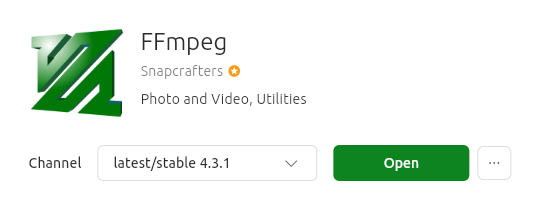

In [ ]:
result = pipe(
    "/home/guillaume/temp/14007-03.11.2024-ITEMA_23913276-2024F4007S0308-22.mp3",
    return_timestamps=True,
)

/home/guillaume/miniforge3/envs/whisper/lib/python3.11/site-packages/transformers/models/whisper/generation_whisper.py:509: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


In [ ]:
result

{'text': " Maïf. Le masque et la plume La vie de sœur siamoise au début du siècle, le fantôme de Michel Berger et de Jacques Chirac, ou encore le retour au théâtre de Sandrine Bonner, c'est le programme de ce masque consacré à l'actualité de la scène. À la tribune, devant le public du Théâtre de l'Alliance française, Les présents sont Sandrine Blanchard du journal Le Monde, Pierre Lesquelen de I.O. Gazette et Détective Sauvage, Fabienne Pasco de Télérama et Laurent Goumar de Libération et France Inter. Dans le détail, notre programme compte La Haine, adapté en comédie musicale, Les Sorts Hilton, par le duo Valérie Lessor et Christian Eck, La Vie et la Mort de Jacques Chirac, Roi des Français, de Léo Cohen-Paperman, une nouvelle mise en scène d'une pièce de Duras, Le Suicidé, qui vient d'entrer au répertoire de la comédie française, et la fin du début, un seul en scène de, et avec Solal, Bouloudnin. Bienvenue, et tous en scène, pour le masque. On a reçu un mail de Singapour. S'enthousia